# Mass balance methods notebook

## TOC

- Mass balance methods, resolved from diff-eqs at steady state, to track mass balances. 
- An example economic mass balance model using musculoskeletal procedure 'nudging'. 


`glue` variables:
- `mass_balance_figure`
- `mass_bal_current_state`
- `mass_bal_transfer_mat`
- `mass_bal_future_state`
- `cost_matrix`
- `mass_bal_mcs`

Add in some generic imports. 

In [1]:
from graphviz import Digraph
import matplotlib.pyplot as plt
import numpy as np
from myst_nb import glue
import dot2tex

## Mass balance methods, resolved from diff-eqs at steady state, to track mass balances

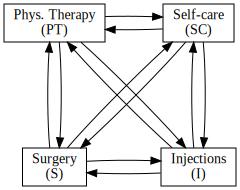

In [2]:
# create new Digraph object w/neato to control label pos. 
mass_balance = Digraph(engine="neato")
mass_balance.node('1',constraint='false',shape = 'box', pos='0,0!',label = 'Surgery \n (S)')
mass_balance.node('2',constraint='false',shape = 'box',pos='0,2!',label = 'Phys. Therapy \n (PT)')
mass_balance.node('3',constraint='false',shape = 'box',pos='2,0!',label = 'Injections \n (I)')
mass_balance.node('4',constraint='false',shape = 'box',pos='2,2!',label = 'Self-care \n (SC)')

# Add edge between 1 and 2
mass_balance.edges(['12'])
mass_balance.edges(['13'])
mass_balance.edges(['14'])

mass_balance.edges(['21'])
mass_balance.edges(['23'])
mass_balance.edges(['24'])

mass_balance.edges(['31'])
mass_balance.edges(['32'])
mass_balance.edges(['34'])

mass_balance.edges(['41'])
mass_balance.edges(['42'])
mass_balance.edges(['43'])

# glue plot to be used in jupyter-book
glue('mass_balance_figure',mass_balance,display=True)

Let's do a single box around surgery.  

\begin{equation}
\frac{d}{dt} \left[ \begin{array}{c} x_1 \\ x_2 \end{array} \right] = \begin{bmatrix} A & B \\ C & D \end{bmatrix} \times \left[ \begin{array}{c} y_1 \\ y_2 \end{array} \right]
\end{equation}


\begin{align}
\frac{d(S)}{dt} &= S(-f_{s-pt} - f_{s-sc} - f_{s-i}) + PT * f_{pt-s} + I * f_{i-s} + SC * f_{sc-s}\\
\frac{d(PT)}{dt} &= S*f_{s-pt}  + PT(- f_{pt-s} - f_{pt-i} - f_{pt-sc}) + SC * f_{sc-pt} + I * f_{i-pt}\\
\frac{d(I)}{dt} &=  S * f_{s-i} + PT * f_{pt-i} + I (- f_{i-s} - f_{i-pt} - f_{i-sc}) + SC * f_{sc-i} \\
\frac{d(SC)}{dt} &= S * f_{s-sc} + PT * f_{pt-sc} + I * f_{i-sc}  + SC(-f_{sc-s} - f_{sc-pt} - f_{sc-i}) 
\end{align}

\begin{align}
\frac{d(S)}{dt} &= S(-f_{s-pt} - f_{s-sc} - f_{s-i}) + PT * f_{pt-s} + I * f_{i-s} + SC * f_{sc-s}\\
\frac{d(PT)}{dt} &= S*f_{s-pt}  + PT(- f_{pt-s} - f_{pt-i} - f_{pt-sc}) + I * f_{i-pt} + SC * f_{sc-pt} \\
\frac{d(I)}{dt} &=  S * f_{s-i} + PT * f_{pt-i} + I (- f_{i-s} - f_{i-pt} - f_{i-sc}) + SC * f_{sc-i} \\
\frac{d(SC)}{dt} &= S * f_{s-sc} + PT * f_{pt-sc} + I * f_{i-sc}  + SC(-f_{sc-s} - f_{sc-pt} - f_{sc-i}) 
\end{align}

In [3]:
import numpy as np
from numpy.linalg import eig
a = np.array([[0.9, 0, .05,.1], 
              [0, 0.9, .05,0],
              [0, 0.05, 0.9,0],
              [0.1, 0.05, 1,0.9]])
w,v=eig(a)
print('E-value:', w)
print('E-vector', v)
    

E-value: [1.   0.8  0.95 0.85]
E-vector [[ 0.70710678  0.70710678 -0.87846618 -0.90378414]
 [ 0.          0.          0.06128834 -0.0732798 ]
 [ 0.          0.          0.06128834  0.0732798 ]
 [ 0.70710678 -0.70710678 -0.46987726  0.41525217]]


In [4]:
current_state = np.matrix([[10000],[4535],[45500],[0]])

In [5]:
import numpy as np
from numpy.linalg import eig
a = np.array([[0.76,0,0,0],
                            [0.1128,0.61,0,0],
                            [0.0072,0,1,0],
                            [0.12,0.39,0,1]])
w,v=eig(a)
print('E-value:', w)
print('E-vector', v)



E-value: [1.   0.61 1.   0.76]
E-vector [[ 0.          0.          0.          0.46975347]
 [ 0.          0.70710678  0.          0.35325461]
 [ 0.          0.          1.         -0.0140926 ]
 [ 1.         -0.70710678  0.         -0.80891548]]


In [6]:
import scipy.integrate

In [7]:

eig(a)

(array([1.  , 0.61, 1.  , 0.76]),
 array([[ 0.        ,  0.        ,  0.        ,  0.46975347],
        [ 0.        ,  0.70710678,  0.        ,  0.35325461],
        [ 0.        ,  0.        ,  1.        , -0.0140926 ],
        [ 1.        , -0.70710678,  0.        , -0.80891548]]))

\begin{align}
x(t) &= \nu \cdot e^{\lambda t}\\
&\downarrow
\end{align}

## An example economic mass balance model using musculoskeletal procedure 'nudging'. 

The current state is a (m x n) matrix, where m = 1, and n is the number of interventions. For case flow routing, think of this like the following: 


Define a current state matrix as follows: 
\begin{equation*}
\mathbf{State}_{current} = 
\begin{vmatrix}
\mathbf{N_{surgery}}  \\
\mathbf{N_{injection}}  \\
\mathbf{N_{pt}}  \\
\mathbf{N_{selfcare}}  \\
\end{vmatrix}
\end{equation*}


Define a transfer state matrix: 
\begin{equation*}
\mathbf{T}_{transfer} = 
\begin{vmatrix} 
f_{s\rightarrow s} & f_{s\rightarrow i} & f_{s\rightarrow pt} & f_{s\rightarrow sc}\\
f_{i\rightarrow s} & f_{i\rightarrow i} & f_{i\rightarrow pt} & f_{i\rightarrow sc}\\
f_{pt\rightarrow s} & f_{pt\rightarrow i} & f_{pt\rightarrow pt} & f_{pt\rightarrow sc}\\
f_{sc\rightarrow s} & f_{sc\rightarrow i} & f_{sc\rightarrow pt} & f_{sc\rightarrow pt}\\
\end{vmatrix}
\end{equation*}

Note that each column will sum to 1. This matrix should be interpreted in terms of the fraction of `row` that flows into `column`. 

### The math

\begin{equation}
\mathbf{T}_{transfer} \cdot \mathbf{State}_{current} =  \mathbf{State}_{future}
\end{equation}

Where the future state is a matrix of similar structue to the current state: 

\begin{equation*}
\mathbf{State}_{future} = 
\begin{vmatrix}
\mathbf{N_{surgery}}  \\
\mathbf{N_{injection}}  \\
\mathbf{N_{pt}}  \\
\mathbf{N_{selfcare}}  \\
\end{vmatrix}
\end{equation*}

Langrangian matrix solution for differential equations. 

Define a 'state' matrix for the 'present', called `current_state`. 

In [8]:
current_state = np.matrix([[10000],[4535],[45500],[0]])
glue('mass_bal_current_state',current_state,display=True)

matrix([[10000],
        [ 4535],
        [45500],
        [    0]])

Define a transfer matrix. See interpretation above. 

In [9]:
transfer_matrix = np.array([[0.76,0,0,0],
                            [0.1128,0.61,0,0],
                            [0.0072,0,1,0],
                            [0.12,0.39,0,1]])
glue('mass_bal_transfer_mat',transfer_matrix,display=True)

array([[0.76  , 0.    , 0.    , 0.    ],
       [0.1128, 0.61  , 0.    , 0.    ],
       [0.0072, 0.    , 1.    , 0.    ],
       [0.12  , 0.39  , 0.    , 1.    ]])

Do the simple linear algebra to find the future state. 

In [10]:
future_state = transfer_matrix*current_state
glue('mass_bal_future_state',future_state,display=True)

matrix([[ 7600.  ],
        [ 3894.35],
        [45572.  ],
        [ 2968.65]])

Define a cost matrix. 

In [11]:
cost_matrix = np.matrix([[15000],[500],[1000],[5]])
glue('cost_matrix',cost_matrix,display=True)

matrix([[15000],
        [  500],
        [ 1000],
        [    5]])

Determine the MCS.

In [12]:
mass_bal_mcs = (future_state - current_state).ravel()*cost_matrix
glue('mass_bal_mcs',mass_bal_mcs,display=True)

matrix([[-36233481.75]])